# Rishi Shah

## Lab: Frequentists Parameter Estimation

In this Lab, we learn how MLE works in practice, and what elements influence the estimation empirically (e.g., number of samples).

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import math
print("Modules Imported!")

Modules Imported!


---
### Maximum Likelihood Estimates

Let us first implement the ML estimates found in HW2 problems 1 and 2.

__Task:__ Write a function that, given samples $\mathbf{y} = [y_1,y_2,\ldots,y_n]$ from Poi($\lambda$), return MLE for $\lambda$. **Solution of this task is given as an example.**

In [38]:
def PoiMLE(y): # y is a one dimensional array containing n samples
    # Begin Solution
    return np.mean(y)
    # End Solution

__Task:__ (5 pts) Write a function that, given samples from Geo($\theta$), return MLE for $\theta$. 

In [39]:
def GeoMLE(y): # y is a one dimensional array containing n samples
    # Begin Solution
    return 1/np.mean(y)
    # End Solution

---
### Bias, Variance and MSE

__Task:__ (20 pts) Let $\lambda = 5$. Generate 10,000 batches of Poi($\lambda$) samples, each containing 10 samples. Using the function PoiMLE above, compute the ML estimates for $\lambda$ for each batch (so you will have 10,000 estimates of $\lambda$). Find the empirical MSE and compare it with the theoretic value. (You can also pick other values of $\lambda$ and repeat the simulation.)

In [40]:
lambd = 5
mypoi = st.poisson(lambd)
N = 10000 # number of batches
n = 10 # samples per batch
y = mypoi.rvs([N,n])
# Begin Solution

'''
mse_emp = (sum(i to n) of (x - xhat)^2) /n

'''
mse_emp = np.mean(np.square(np.apply_along_axis(PoiMLE, 1, y) - lambd))
'''
mse_theo = lambda / n
'''
mse_theo = lambd/n

print("Empirical MSE of lambda_hat:", mse_emp)
print("Theoretical MSE of lambda_hat:", mse_theo)
# 
# End Solution

Empirical MSE of lambda_hat: 0.5037999999999999
Theoretical MSE of lambda_hat: 0.5


__Task:__ (20 pts) Let $\theta = 0.35$. Again, generate 10,000 batches of Geo($\theta$) samples, each containing $n=1$ sample. Using the function GeoMLE above, compute the ML estimates for $\theta$ for each batch. Find the empirical bias and compare it with the theoretical value. Note that the bias for $n=1$ is $\frac{\theta}{1-\theta}\log\frac{1}{\theta}-\theta$. (You can also pick other values of $\theta$ and repeat the simulation.)

In [45]:
theta = 0.35
mygeo = st.geom(theta)
N = 10000 # number of batches
n = 1 # samples per batch
y = mygeo.rvs([N,n])
# Begin Solution

'''
bias_emp = (sum(i to n) of (x - xhat)^2) /n

'''
bias_emp = np.mean(np.apply_along_axis(GeoMLE, 1, y) - theta)
'''
bias_theo = lambda / n
'''
bias_theo = (theta/(1-theta))*math.log(1/theta) - theta

print("Empirical Bias of theta_hat:", bias_emp)
print("Theoretical Bias of theta_hat:", bias_theo)

# End Solution

Empirical Bias of theta_hat: 0.20786317266883444
Theoretical Bias of theta_hat: 0.2152888362685187


---
### Consistency
Intuitively, an estimator is consistent if it gives us the correct solution when we have lots of data. 

__Task:__ (25 pts) Generate a vector $y$ consisting of $N$ samples drawn from Geo($\theta$) for $\theta=0.35$, and a large value of $N$, say $N=5000$. Then compute the MLE for $\theta$ using the first $n$ sample (that is `y[0:n]`) as $n$ ranges from 10 to $N$, choosing an appropriate step size. Plot the result and discuss it in the context of consistency. Does MLE appear to be consistent?

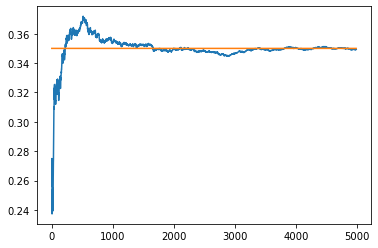

In [60]:
theta = 0.35
# Begin Solution
mygeo = st.geom(theta)
N = 5000 # number of batches
n = 1 # samples per batch
y = mygeo.rvs(N)
mle = []
for i in range(0, N-10):
    mle.append(GeoMLE(y[0:10+i]))
mle = np.array(mle)
true_param=np.array([theta]*(N-10))
plt.plot(mle, label = "MLE")
plt.plot(true_param, label = "True Theta Value")
plt.show()

# End Solution

The MLE appears to be consistent.

_____
### Asymptotic Normality
Consider the Gaussian distribution $\mathcal{N}(\mu,\sigma^2)$. Let $\hat\mu$ and $\hat\sigma^2$ be the maximum likelihood estimators for the Gaussian mean $\mu$ and Gaussian variance $\sigma^2$.

__Task:__ (10 pts) Write a function that, given samples drawn from $\mathcal{N}(\mu,\sigma^2)$, returns the maximum likelihood estimates of $\mu$ and $\sigma^2$.

In [61]:
def NormML(y): # y is a one dimensional array containing the samples
    # Begin Solution
   
    mu_hat = np.mean(y)
    sigma2_hat = np.mean(np.square(y-mu_hat))
   
    # End Solution
    return mu_hat, sigma2_hat
    

From the asymptotic normality of the ML estimator we have
$$\sqrt{n}(\hat\mu-\mu)\to \mathcal{N}(0,I^{-1}(\mu))$$
where $I$ is the Fisher information and in this case equals $I(\mu)=\frac{1}{\sigma^2}$.

And for $\sigma^2$,
$$\sqrt{n}({\hat\sigma^2}-\sigma^2)\to \mathcal{N}(0,I^{-1}(\sigma^2)),$$
where $I(\sigma^2)=1/(2\sigma^4)$. 

__Task:__ (20 pts) Generate 10000 batches of $\mathcal{N}(3,4)$ samples, each containing $n=10$ samples. Using the function NormML above, compute the ML estimates for $\mu$ and $\sigma$ for each batch (so you will have 10,000 estimates of the same $\mu$ and $\sigma$). 

Plot the histograms for the estimates (multiplied by $\sqrt{n}$ as above) and compare them with the limit distribution given on the right side of the above expressions. Are the approximations by the limit distributions accurate to the same degree for both mean and the variance? If not, why do you think that is the case? (You can try with batches with more samples, e.g., $n=100$ or even $n = 1000$, and verify that for large batches, they become increasingly better approximations).

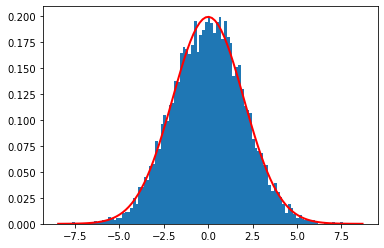

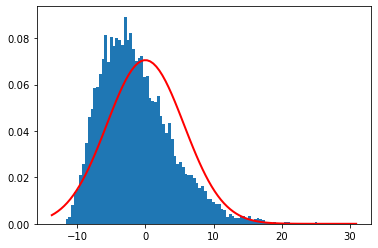

In [113]:
theta0 = [3,4] #[mean,variance]
mynorm = st.norm(theta0[0],np.sqrt(theta0[1]))
N = 10000 # number of batches
n = 10 # samples per batch
y = mynorm.rvs([N,n])

# Begin Solution
df = np.apply_along_axis(NormML,1,y)
mu_mle, sig2_mle = df[:,0], df[:, 1]
plt.hist(math.sqrt(n)*(mu_mle-theta0[0]), density=True, bins=math.floor(math.sqrt(N)))
rnge = np.linspace(plt.xlim()[0], plt.xlim()[1], math.floor(math.sqrt(N)))
p = st.norm.pdf(rnge, 0, math.sqrt(theta0[1]))
plt.plot(rnge, p, 'red', linewidth=2)
plt.show()
plt.hist(math.sqrt(n)*(sig2_mle-theta0[1]), density=True, bins=math.floor(math.sqrt(N)))
rnge = np.linspace(plt.xlim()[0], plt.xlim()[1], math.floor(math.sqrt(N)))
p = st.norm.pdf(rnge, 0, math.sqrt(2*(theta0[1]**2)))
plt.plot(rnge, p, 'red', linewidth=2)
plt.show()
# End Solution

The approximate distribution is more accurate for the mean, while the variance looks right-skewed. When the sample size increases to n=1000, the variance closely follows the normal distribution.

---
### Confidence interval 

**Solution provided for this part, but you are encouraged to try writing your own.** In problem 4 of HW2, we are trying to estimate the fraction of people who approve the job the president is doing. Let $\hat p$ denote the ML estimate of the true fraction $p$ obtained from asking $n$ random individuals.

We proved that 
$$
\Pr(|\hat p- p| <\frac{a}{2\sqrt{n}}) \ge 1- \frac{1}{a^2}.
$$
With $a = 5$ and $n = 100$, we have at least $96\%$ chance the absolute error of the ML estimate is less than $25\%$. Let us verify this.

__Task:__ Suppose $p = 0.45$. Generate 10000 batches of Ber($p$) samples, each containing $n=100$ samples. Compute the ML estimates for $p$ and count the fraction of ML estimates that is within $\frac{a}{2\sqrt{n}}$ of $p$, $a = 5$. 

In [122]:
# Begin Solution
def BerML(y):
    return sum(y)/len(y)

p = 0.45
mynorm = st.bernoulli(p)
N = 10000 # number of batches
n = 100 # samples per batch
y = mynorm.rvs([N,n])
p_hats = [BerML(y[i]) for i in range(N)]
a = 5
margin = a / 2 /np.sqrt(n)
frac = sum([p-margin<x<p+margin for x in p_hats])/N
print("the fraction of estiamtes that are within the 25% margin of p is ", frac)
# End Solution

the fraction of estiamtes that are within the 25% margin of p is  1.0
